In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

import helper as hp

pd.set_option('display.float_format', '{:.4f}'.format)

In [28]:
# original dataframe
odf = pd.read_csv('bankdata_training.csv').drop(['duration'], axis=1)

# Convert target to binary
odf['y'] = odf['y'].map({'yes': 1, 'no': 0})

print(odf.shape)
odf.head()

(4119, 20)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8000,92.8930,-46.2000,1.3130,5099.1000,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8550,5191.0000,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4000,94.4650,-41.8000,4.9620,5228.1000,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,3,999,0,nonexistent,1.4000,94.4650,-41.8000,4.9590,5228.1000,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1000,93.2000,-42.0000,4.1910,5195.8000,0


In [29]:
# removing all unknowns
clean_odf = hp.clean_dataframe(odf)

clean_odf

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,2,999,0,nonexistent,-1.8000,92.8930,-46.2000,1.3130,5099.1000,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,4,999,0,nonexistent,1.1000,93.9940,-36.4000,4.8550,5191.0000,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,1,999,0,nonexistent,1.4000,94.4650,-41.8000,4.9620,5228.1000,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,1,999,0,nonexistent,-0.1000,93.2000,-42.0000,4.1910,5195.8000,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,3,999,2,failure,-1.1000,94.1990,-37.5000,0.8840,4963.6000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,30,admin.,married,basic.6y,no,yes,yes,cellular,jul,thu,1,999,0,nonexistent,1.4000,93.9180,-42.7000,4.9580,5228.1000,0
4115,39,admin.,married,high.school,no,yes,no,telephone,jul,fri,1,999,0,nonexistent,1.4000,93.9180,-42.7000,4.9590,5228.1000,0
4116,27,student,single,high.school,no,no,no,cellular,may,mon,2,999,1,failure,-1.8000,92.8930,-46.2000,1.3540,5099.1000,0
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,1,999,0,nonexistent,1.4000,93.4440,-36.1000,4.9660,5228.1000,0


In [30]:
# LabelEncoder dummy variables
odf_dummies = hp.le_dummies(odf)
codf_dummies = hp.le_dummies(clean_odf)

print(f'odf_dummies shape: {odf_dummies.shape}')
print(f'codf_dummies shape: {codf_dummies.shape}')

odf_dummies shape: (4119, 20)
codf_dummies shape: (3090, 20)


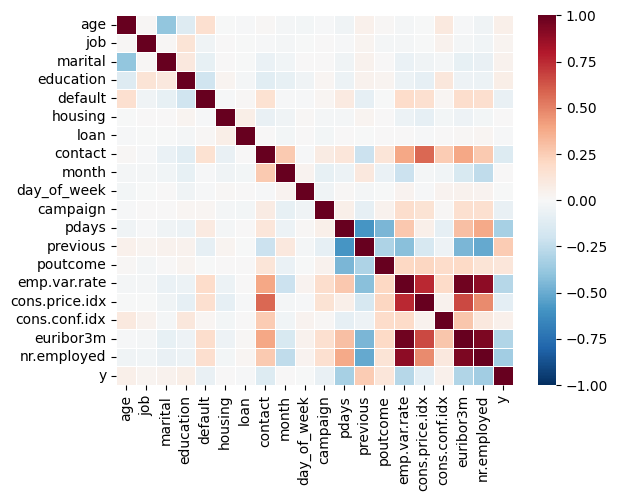

In [31]:
sns.heatmap(odf_dummies.corr(), annot=False, cmap='RdBu_r', linewidths=0.5, annot_kws={'size': 10}, vmin=-1, vmax=1)
plt.show()

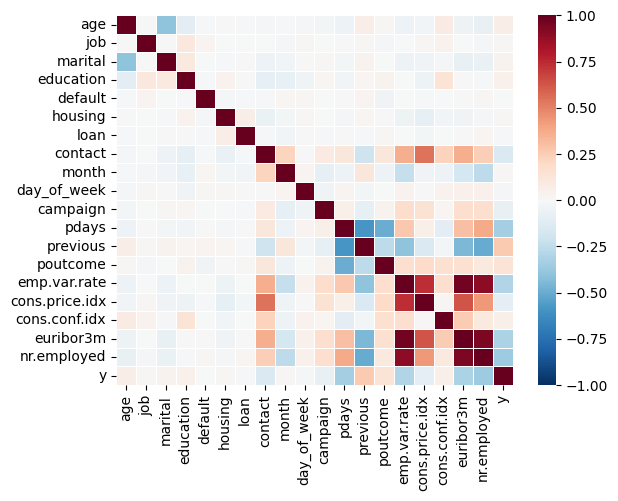

In [32]:
sns.heatmap(codf_dummies.corr(), annot=False, cmap='RdBu_r', linewidths=0.5, annot_kws={'size': 10}, vmin=-1, vmax=1)
plt.show()

Nothing seems to have a strong positive or negative correlation with our target variable, as such, we will now compare if removing `unknown` values from the dataset will have a significant impact on the correlation of predictors with the target variable.

In [33]:
odf_full = hp.rsquared_abs_corr(odf_dummies)
codf_full = hp.rsquared_abs_corr(codf_dummies)

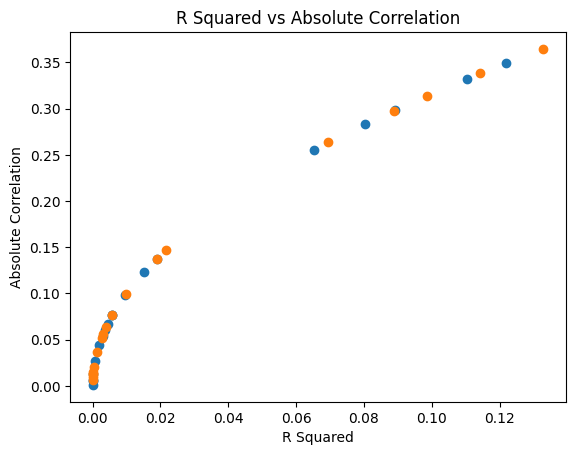

In [34]:
plt.scatter(odf_full['rsquared'], odf_full['abs_corr'])
plt.scatter(codf_full['rsquared'], codf_full['abs_corr'])
plt.xlabel('R Squared')
plt.ylabel('Absolute Correlation')
plt.title('R Squared vs Absolute Correlation')
plt.show()

In [35]:
compare_df = pd.concat([odf_full, codf_full], axis=1)
compare_df.columns = [['odf', '', 'codf', ''], compare_df.columns]

compare_df

,odf,,codf,
,rsquared,abs_corr,rsquared,abs_corr
nr.employed,0.1220,0.3492,0.1329,0.3646
pdays,0.1102,0.3320,0.1143,0.3381
euribor3m,0.0891,0.2986,0.0984,0.3138
emp.var.rate,0.0802,0.2832,0.0887,0.2978
previous,0.0654,0.2557,0.0694,0.2634
contact,0.0189,0.1374,0.0216,0.1468
poutcome,0.0152,0.1234,0.0189,0.1374
cons.price.idx,0.0097,0.0983,0.0099,0.0994
default,0.0059,0.0766,0.0000,0.0066


Removing `unknown` values from the dataset seems to improve the correlation of the predictors with the target variable. `unknown` will now be removed from the dataset when it appears.

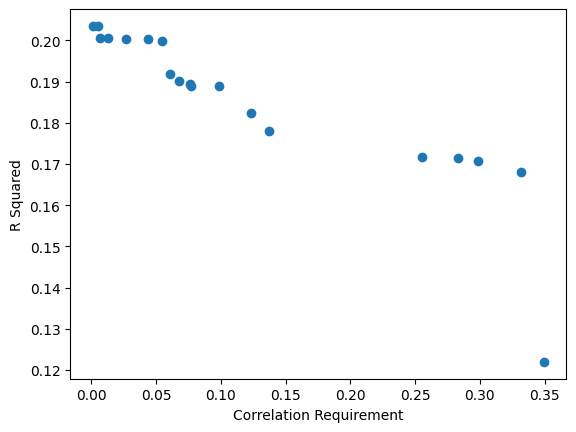

In [36]:
results = hp.corr_iterator(odf, force_clean=False)

plt.scatter(results['corr_req'], results['rsquared'])
plt.xlabel('Correlation Requirement')
plt.ylabel('R Squared')
plt.show()

Steps:
- 

In [44]:
def find_best(df: pd.DataFrame, num_cols: int = 5, target: str = 'y'):
    """ Finds the best `num_cols` columns to use for a linear regression model."""
    best_cols = []
    remaining_cols = df.drop(target, axis=1).columns.tolist()
    
    while len(best_cols) < num_cols:
        testing_cols = pd.DataFrame(columns=['rsquared'])
        for col in remaining_cols:
            cols = best_cols + [col]
            rsquared = sm.OLS(df[target], sm.add_constant(hp.le_dummies(df[cols]))).fit().rsquared
            testing_cols.loc[col] = [rsquared]
        
        best = testing_cols.idxmax()[0]
        best_cols.append(best)
        remaining_cols.remove(best)
        
    
    
    return best_cols

find_best(odf, num_cols=5, target='y')

['nr.employed', 'pdays', 'month', 'euribor3m', 'emp.var.rate']

In [38]:
odf.corr()['y'].drop('y').abs().sort_values(ascending=False).idxmax()

'nr.employed'